In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

sns.set_palette("pastel")

## Анализ

In [4]:
df = pd.read_csv('src/AirlineQualityRatings.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
df[df.columns[:8]]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay
0,1,Male,48,First-time,Business,Business,821,2
1,2,Female,35,Returning,Business,Business,821,26
2,3,Male,41,Returning,Business,Business,853,0
3,4,Male,50,Returning,Business,Business,1905,0
4,5,Female,49,Returning,Business,Business,3470,0
...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31


In [7]:
df[df.columns[8:16]]

,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort
0,5.0,3,3,4,3,3,3,5
1,39.0,2,2,3,5,2,5,4
2,0.0,4,4,4,5,4,3,5
3,0.0,2,2,3,4,2,5,5
4,1.0,3,3,3,5,3,3,4
...,...,...,...,...,...,...,...,...
129875,3.0,4,4,4,4,2,5,1
129876,0.0,5,3,5,3,4,5,2
129877,14.0,5,2,4,2,1,3,3
129878,22.0,4,4,3,4,1,4,4


In [8]:
df[df.columns[16:24]]

,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,5,5,3,5,2,5,5,Satisfied
2,3,5,5,3,4,3,3,Satisfied
3,5,4,4,5,2,5,5,Satisfied
4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...
129875,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,5,3,3,4,5,3,5,Satisfied


In [9]:
df = df.drop(columns=['ID'])

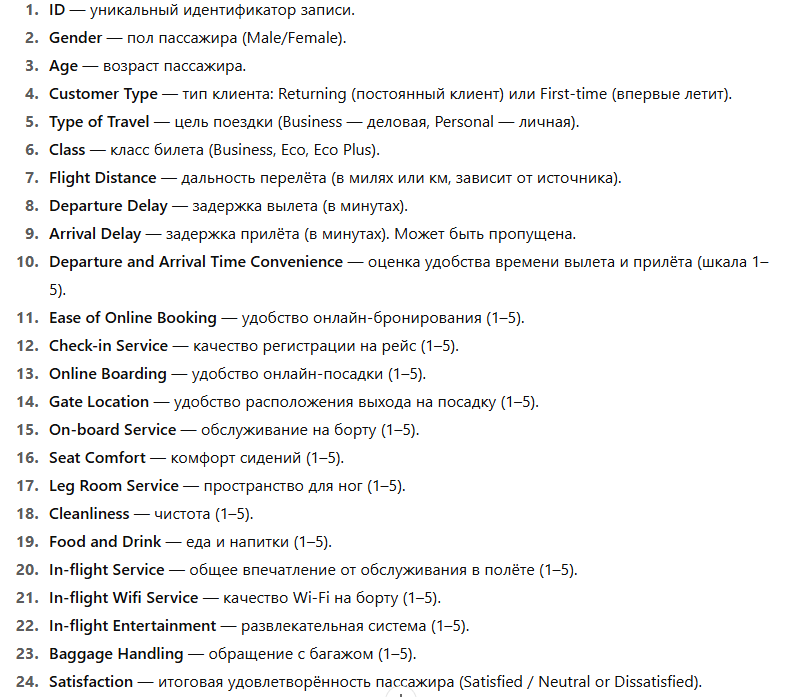

In [10]:
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [11]:
df.duplicated().sum()

np.int64(0)

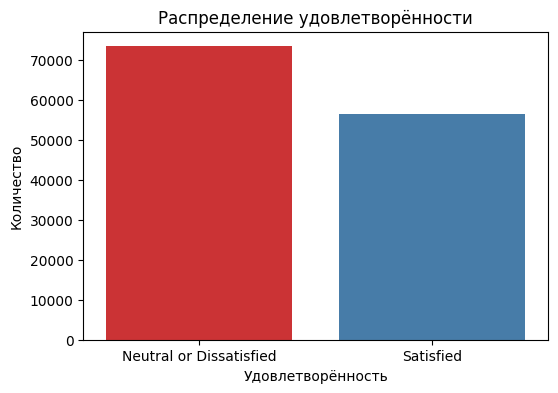

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Satisfaction', data=df, hue='Satisfaction', palette='Set1')
plt.title('Распределение удовлетворённости')
plt.xlabel('Удовлетворённость')
plt.ylabel('Количество')
plt.show()

In [13]:
df['Satisfaction'] = df['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})
df['Satisfaction']

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129880, dtype: int64

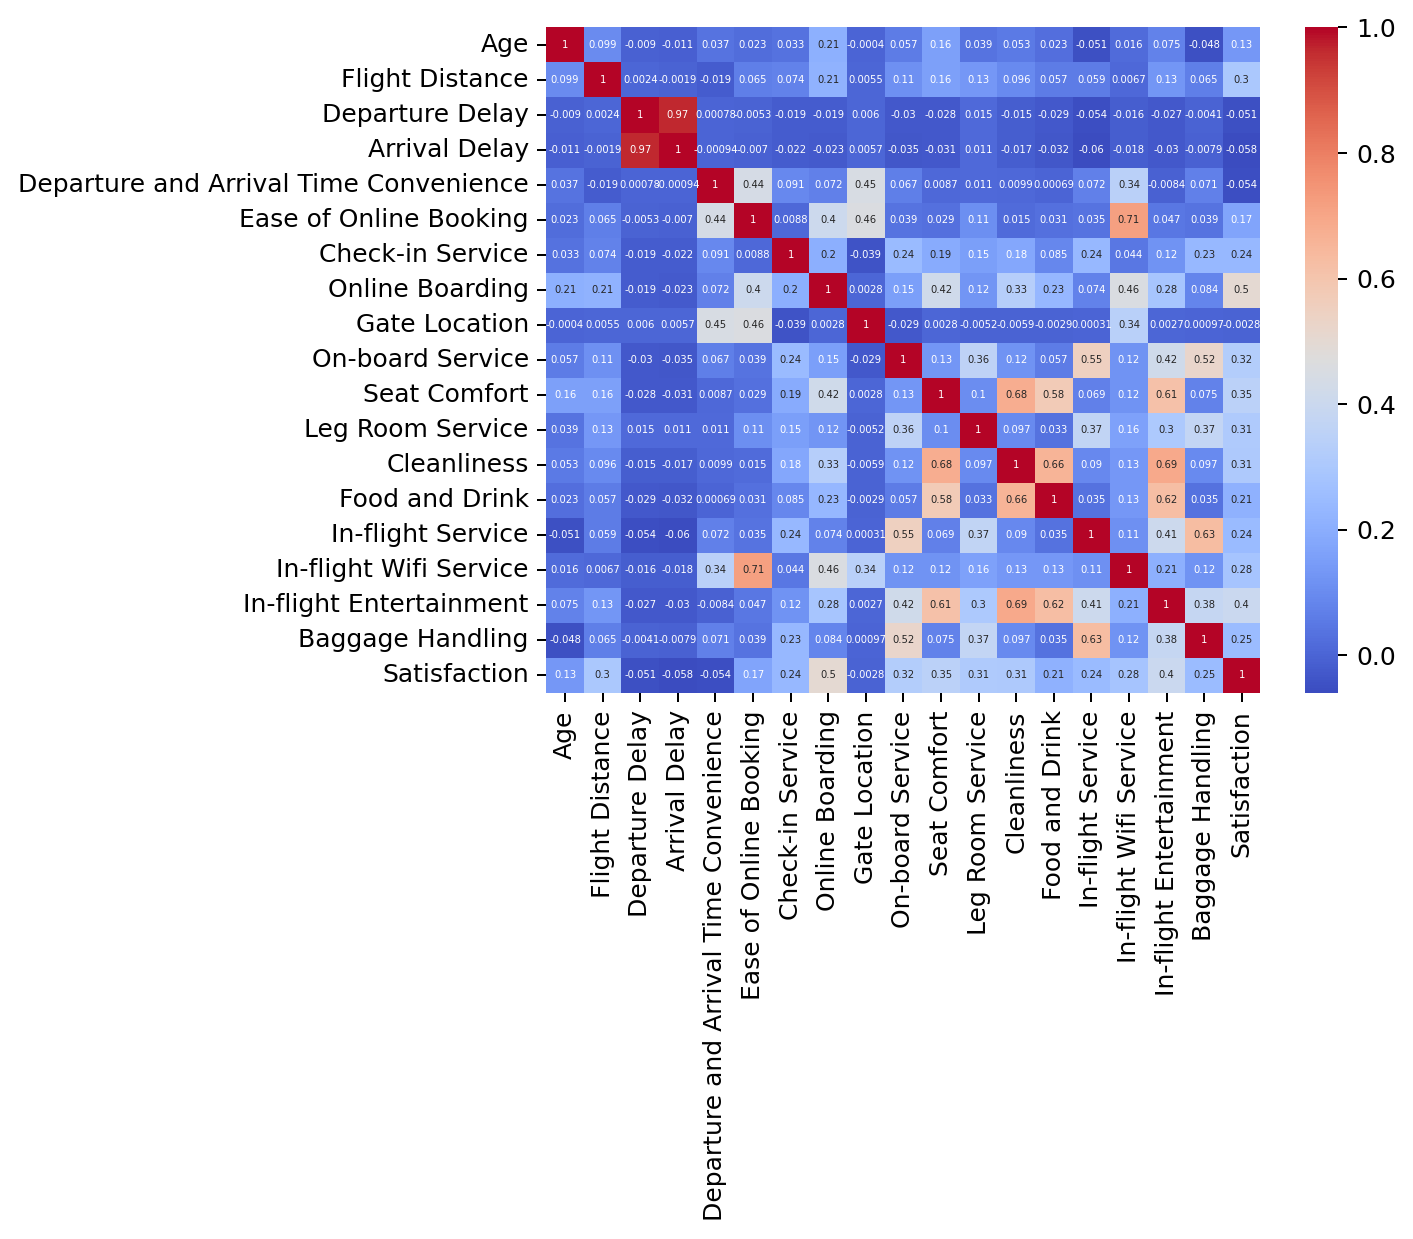

In [14]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(dpi=180)
sns.heatmap(corr, annot=True, annot_kws={'size':4}, cmap='coolwarm')
plt.show()

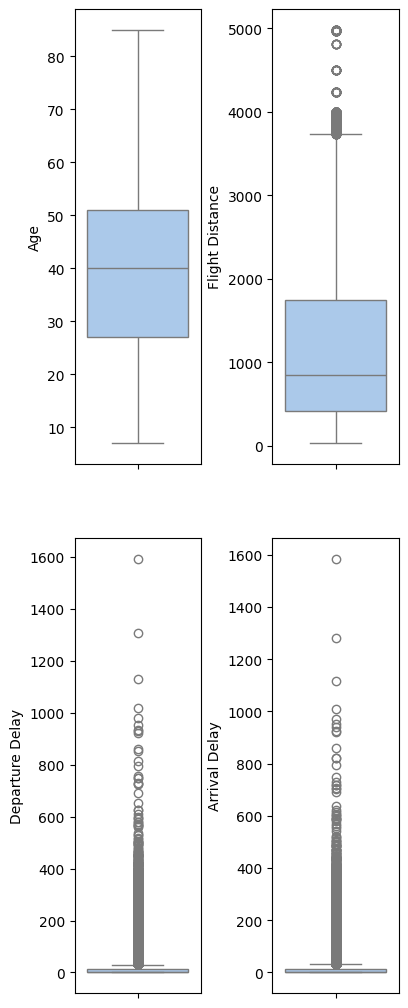

In [40]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(4,10))
index = 0
axs = axs.flatten()

for column_name in ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']:
    sns.boxplot(y=column_name, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [16]:
X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [18]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [19]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [20]:
X[categorical_features].nunique()

Gender            2
Customer Type     2
Type of Travel    2
Class             3
dtype: int64

In [21]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
prep_X_train = preprocessor.fit_transform(X_train)
prep_X_test = preprocessor.transform(X_test)

In [23]:
features_name = preprocessor.get_feature_names_out()
features_name

array(['num__Age', 'num__Flight Distance', 'num__Departure Delay',
       'num__Arrival Delay',
       'num__Departure and Arrival Time Convenience',
       'num__Ease of Online Booking', 'num__Check-in Service',
       'num__Online Boarding', 'num__Gate Location',
       'num__On-board Service', 'num__Seat Comfort',
       'num__Leg Room Service', 'num__Cleanliness', 'num__Food and Drink',
       'num__In-flight Service', 'num__In-flight Wifi Service',
       'num__In-flight Entertainment', 'num__Baggage Handling',
       'cat__Gender_Female', 'cat__Gender_Male',
       'cat__Customer Type_First-time', 'cat__Customer Type_Returning',
       'cat__Type of Travel_Business', 'cat__Type of Travel_Personal',
       'cat__Class_Business', 'cat__Class_Economy',
       'cat__Class_Economy Plus'], dtype=object)

In [24]:
len(features_name)

27

## Помощь

In [25]:
def print_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Функция для расчета и вывода метрик
    """
    accuracy = accuracy_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    print('Метрики:')
    print(f'accuracy = {accuracy:.5f}')
    print(f'log_loss = {loss:.5f}')
    
    return accuracy, loss

In [ ]:
def probability_to_rating(probabilities):
    """
    Преобразует степень уверенности (вероятность) в оценку от 1 до 5.
    """
    prob_class_1 = np.array(probabilities)[:, 1]
    if np.any((prob_class_1 < 0) | (prob_class_1 > 1)):
        raise ValueError("Все вероятности должны быть в диапазоне [0, 1]")
    continuous_ratings = prob_class_1 * 4 + 1
    return continuous_ratings

## Логистическая регрессия

In [27]:
log_model = LogisticRegression()
log_model.fit(prep_X_train, y_train)

y_log_pred = log_model.predict(prep_X_test)

accuracy_lr, loss_lr = print_metrics(y_test, y_log_pred)

Метрики:
accuracy = 0.87415
log_loss = 4.53598


In [28]:
y_log_pred_proba = log_model.predict_proba(prep_X_test)
log_prob_scale = probability_to_rating(y_log_pred_proba)
log_prob_scale[20:40]

array([4.91700799, 1.79577784, 2.76691267, 4.72212469, 1.71585311,
       4.89087413, 1.00526875, 1.22994373, 4.85861623, 1.52327588,
       1.49309289, 3.92822322, 2.3190472 , 1.23030786, 1.85231992,
       1.74868621, 1.23373662, 1.11201857, 1.10495235, 1.22948957])

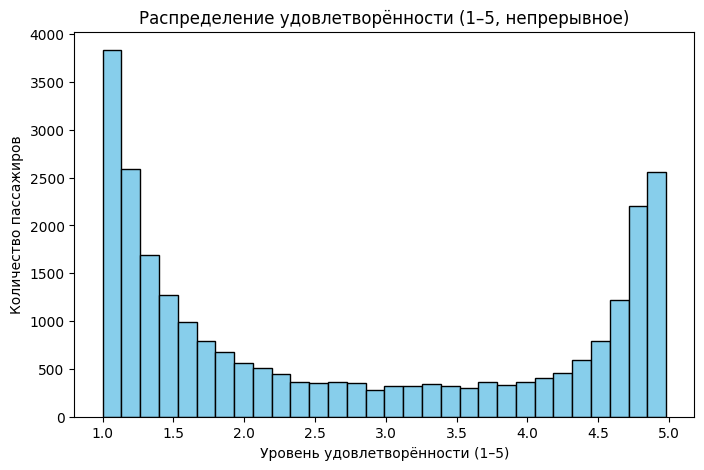

In [29]:
plt.figure(figsize=(8,5))
plt.hist(log_prob_scale, bins=30, color="skyblue", edgecolor="black")
plt.title("Распределение удовлетворённости (1–5, непрерывное)")
plt.xlabel("Уровень удовлетворённости (1–5)")
plt.ylabel("Количество пассажиров")
plt.show()

## XGBoost

In [30]:
from xgboost import XGBClassifier

In [31]:
xgb = XGBClassifier(n_estimators=600)

xgb.fit(prep_X_train, y_train)
y_xgb_pred = xgb.predict(prep_X_test)

xgb_lr, xgb_lr = print_metrics(y_test, y_xgb_pred)

Метрики:
accuracy = 0.96189
log_loss = 1.37370


In [32]:
xgb_space = {
    "n_estimators": hp.quniform("n_estimators", 300, 800, 50),
    "learning_rate": hp.uniform("learning_rate", 0.01, 0.5),
    "max_depth": hp.quniform("max_depth", 3, 10, 1),
    "min_child_weight": hp.quniform("min_child_weight", 1, 10, 1),
    "subsample": hp.uniform("subsample", 0.4, 0.9),
    "reg_lambda": hp.loguniform("reg_lambda", np.log(1e-3), np.log(10.0)),
    "reg_alpha": hp.loguniform("reg_alpha", np.log(1e-6), np.log(1.0))
}

In [33]:
def objective(params):
    xgb = XGBClassifier(
        n_estimators=int(params["n_estimators"]),
        learning_rate=float(params["learning_rate"]),
        max_depth=int(params["max_depth"]),
        min_child_weight=float(params["min_child_weight"]),
        subsample=float(params["subsample"]),
        reg_lambda=float(params["reg_lambda"]),
        reg_alpha=float(params["reg_alpha"]),
        random_state=42,
        n_jobs=-1
    )
    
    xgb.fit(prep_X_train, y_train)

    y_xgb_pred = xgb.predict(prep_X_test)

    accuracy = accuracy_score(y_test, y_xgb_pred)
    
    return {"loss": accuracy, "status": STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest,
            max_evals=10, trials=trials, rstate=np.random.default_rng(42))

best

100%|██████████| 10/10 [00:15<00:00,  1.58s/trial, best loss: 0.9546889436402833]


{'learning_rate': np.float64(0.44666313719308415),
 'max_depth': np.float64(9.0),
 'min_child_weight': np.float64(6.0),
 'n_estimators': np.float64(400.0),
 'reg_alpha': np.float64(0.005081186173332111),
 'reg_lambda': np.float64(0.0019708070256395107),
 'subsample': np.float64(0.4734813936425139)}

In [34]:
xgb = XGBClassifier(
        n_estimators=int(best["n_estimators"]),
        learning_rate=float(best["learning_rate"]),
        max_depth=int(best["max_depth"]),
        min_child_weight=float(best["min_child_weight"]),
        subsample=float(best["subsample"]),
        reg_lambda=float(best["reg_lambda"]),
        reg_alpha=float(best["reg_alpha"]),
        random_state=42,
        n_jobs=-1
    )
    
xgb.fit(prep_X_train, y_train)

y_xgb_pred = xgb.predict(prep_X_test)

xgb_lr, xgb_lr = print_metrics(y_test, y_xgb_pred)

Метрики:
accuracy = 0.95469
log_loss = 1.63318


In [35]:
y_xgb_pred_proba = xgb.predict_proba(prep_X_test)
y_xgb_pred_proba

array([[9.9999982e-01, 2.0029979e-07],
       [1.2397766e-05, 9.9998760e-01],
       [4.2915344e-06, 9.9999571e-01],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [9.9951792e-01, 4.8210469e-04],
       [1.1920929e-07, 9.9999988e-01]], shape=(25976, 2), dtype=float32)

In [36]:
probs = xgb.predict_proba(prep_X_test)[:, 1]
ratings_cont = 1 + 4 * probs

ratings_cont

array([1.0000008, 4.9999504, 4.999983 , ..., 5.       , 1.0019284,
       4.9999995], shape=(25976,), dtype=float32)

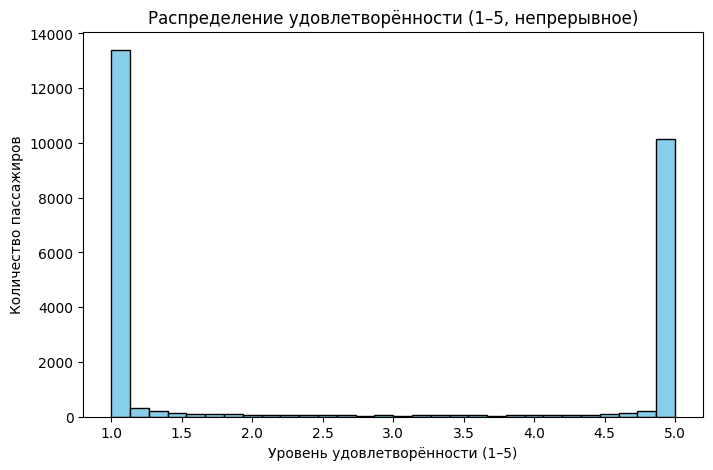

In [37]:
plt.figure(figsize=(8,5))
plt.hist(ratings_cont, bins=30, color="skyblue", edgecolor="black")
plt.title("Распределение удовлетворённости (1–5, непрерывное)")
plt.xlabel("Уровень удовлетворённости (1–5)")
plt.ylabel("Количество пассажиров")
plt.show()

## Дерево решений

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [39]:
# Определение пространства поиска гиперпараметров
space_hyperopt = {
    'max_depth': hp.choice('max_depth', range(5, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 20)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'criterion': hp.choice('criterion', ['squared_error', 'absolute_error']),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])
}

# Функиция для оптимизации
def objective(params: dict) -> dict:
    tree = DecisionTreeRegressor(
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        criterion=params['criterion'],
        max_features=params['max_features'],
        random_state=42
    )

    # Кросс-валидация
    score = cross_val_score(tree, prep_X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()

    # Возврат минус точность, т.к. hyperopt минимизирует функцию
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space_hyperopt, algo=tpe.suggest,
            max_evals=10, trials=trials)

print('Лучшие параметры')
best

  0%|          | 0/10 [00:51<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [46]:
dt = DecisionTreeRegressor(random_state=42, max_depth=14, min_samples_leaf=4, min_samples_split=4, criterion='squared_error')
dt.fit(prep_X_train, y_train)

y_dt_pred = dt.predict(prep_X_test)

In [49]:
r2_score(y_test, y_dt_pred)

0.8563964354600788